In [17]:
df.to_csv("dados_vendas.csv", index=False)

Exportar para csv

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#selecionando variáveis
df["dia"] = df["data"].dt.day
df["mes"] = df["data"].dt.month
df["ano"] = df["data"].dt.year

x = df[["dia", "mes", "ano", "quantidade", "preco_unitario"]]
y = df["receita"]

#Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

#Avaliando o modelo
y_pred = modelo.predict(x_test)
erro = mean_absolute_error(y_test, y_pred)
print(f"Erro médio absoluto: R$ {erro:2f}")

Erro médio absoluto: R$ 289.206003


Criando um modelo de previsão de receita:

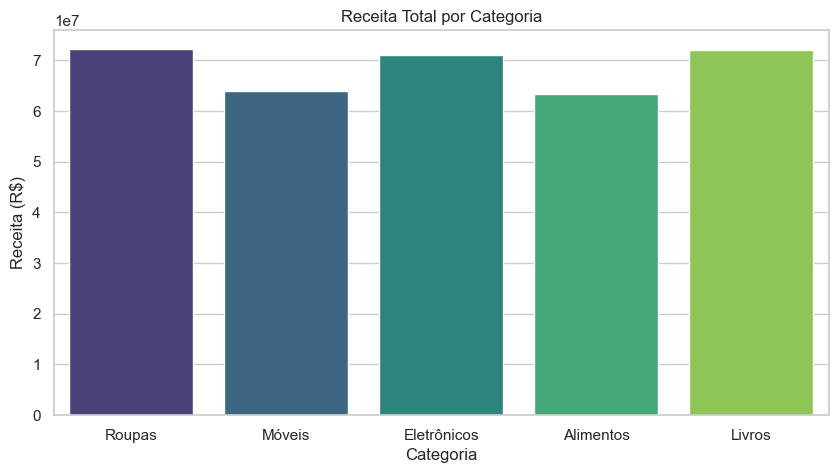

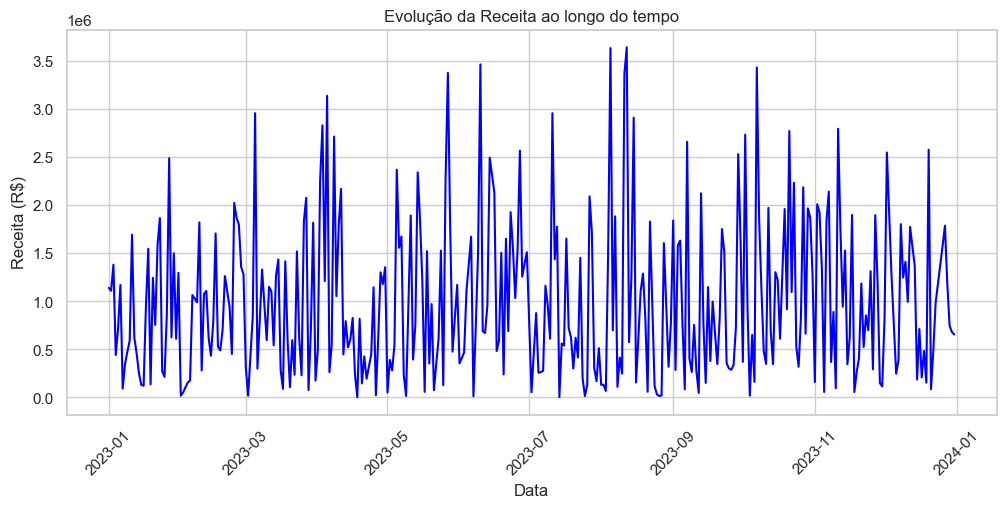

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#configuração do estilo
sns.set_theme(style="whitegrid")

#receita total por categoria
plt.figure(figsize=(10, 5))
sns.barplot(x=df["categoria"], y=df["receita"], estimator=sum, errorbar=None, palette="viridis", hue=df["categoria"], legend=False)
plt.title("Receita Total por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Receita (R$)")
plt.show()

#receita ao longo do tempo
df["data"] = pd.to_datetime(df["data"])
df_grouped = df.groupby("data")["receita"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=df_grouped["data"], y=df_grouped["receita"], color="blue")
plt.title("Evolução da Receita ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Receita (R$)")
plt.xticks(rotation=45)
plt.show()

Análise exploratória de dados (EDA)

In [8]:
import sqlite3
import pandas as pd

#conectar ao banco de dados
conn = sqlite3.connect("ecommerce.db")

#carregar os dados
df = pd.read_sql_query("SELECT * FROM vendas", conn)
conn.close()

#Ver as primeiras linhas
print(df.head())

#Verificar se há valores nulos
print(df.isnull().sum())

#resumo estatístico dos dados
print(df.describe())

   id        data categoria   produto  quantidade  preco_unitario  receita
0   1  2023-03-25    Roupas     Calça           2          340.36   680.72
1   2  2023-07-15    Roupas  Camiseta           1          274.61   274.61
2   3  2023-07-15    Roupas  Camiseta           1          274.61   274.61
3   4  2023-02-19    Móveis      Mesa           1          458.88   458.88
4   5  2023-07-15    Roupas  Camiseta           1          274.61   274.61
id                0
data              0
categoria         0
produto           0
quantidade        0
preco_unitario    0
receita           0
dtype: int64
                  id     quantidade  preco_unitario        receita
count  250502.000000  250502.000000   250502.000000  250502.000000
mean   125251.500000       5.361817      256.177989    1366.852434
std     72313.842904       2.794803      141.526556    1101.164126
min         1.000000       1.000000       10.130000      13.400000
25%     62626.250000       3.000000      133.890000     454.06

Explorando e limpando os dados:

In [7]:
import sqlite3
import pandas as pd
import random
from datetime import datetime, timedelta

#criando o banco de dados a partir daqui

conn = sqlite3.connect("ecommerce.db")
cursor = conn.cursor()

#criando a tabela de vendas

cursor.execute("""
CREATE TABLE IF NOT EXISTS vendas (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               data DATE,
               categoria TEXT,
               produto TEXT,
               quantidade INTEGER,
               preco_unitario REAL,
               receita REAL
               )
""")

#criando dados fictícios

categorias = ["Eletrônicos", "Roupas", "Livros", "Móveis", "Alimentos"]
produtos = {
    "Eletrônicos": ["Smartphone", "Notebook", "Fone de ouvido"],
    "Roupas": ["Camiseta", "Calça", "Jaqueta"],
    "Livros": ["Ficção", "Não-Ficção", "Técnico"],
    "Móveis": ["Cadeira", "Mesa", "Sofá"],
    "Alimentos": ["Arroz", "Feijão", "Macarrão"]
}

data_inicio = datetime(2023, 1, 1)
dados = []

for _ in range(500): #criando 500 registros de vendas
    data = data_inicio + timedelta(days=random.randint(0, 365))
    categoria = random.choice(categorias)
    produto = random.choice(produtos[categoria])
    quantidade = random.randint(1, 10)
    preco = round(random.uniform(10, 500), 2)
    receita = round(quantidade * preco, 2)

    dados.append((data.strftime("%Y-%m-%d"), categoria, produto, quantidade, preco, receita))

    #inserindo os dados na tabela

    cursor.executemany("INSERT INTO vendas (data, categoria, produto, quantidade, preco_unitario, receita) VALUES (?, ?, ?, ?, ?, ?)", dados)
    conn.commit()
   
    

Criando o banco de dados SQLite fictício